In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

In [26]:
x = torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
y  = torch.LongTensor([0,1,1,0])

In [27]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()
        self.fc1 = nn.Linear(2,7)
        self.fc2 = nn.Linear(7,2)
    def forward(self,x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        return x

In [28]:
model = XORModel()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [29]:
epochs = 10000
losses = []
for epoch in range(epochs):
    outputs = model(x)
    loss = criterion(outputs,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch%1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/10000], Loss: 0.1400
Epoch [1001/10000], Loss: -30.5829
Epoch [2001/10000], Loss: -70.4433
Epoch [3001/10000], Loss: -110.4211
Epoch [4001/10000], Loss: -150.4124
Epoch [5001/10000], Loss: -190.4077
Epoch [6001/10000], Loss: -230.4046
Epoch [7001/10000], Loss: -270.4033
Epoch [8001/10000], Loss: -310.3976
Epoch [9001/10000], Loss: -350.3981


In [33]:
with torch.no_grad():
    test_data = torch.Tensor([[0,0],[0,1],[1,0],[1,1]])
    predictions = model(test_data)
    predicted_labels = torch.argmax(predictions,dim=1)
    print("Predictions:",predicted_labels.numpy())

Predictions: [1 1 1 1]


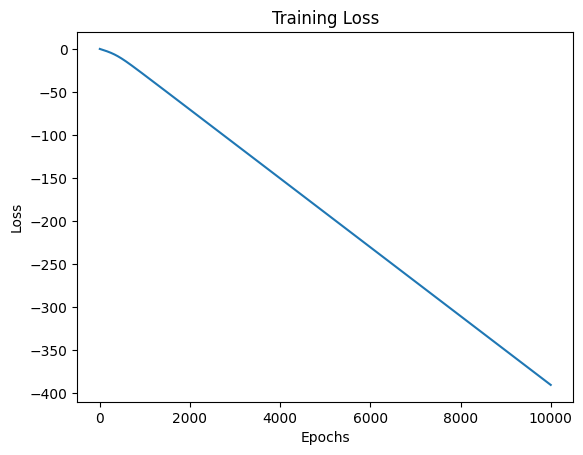

In [31]:
import matplotlib.pyplot as plt

plt.plot(range(1,epochs+1),losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()